In [18]:
import pandas as pd
from sklearn.metrics import f1_score


In [19]:
#NLI_B
df = pd.read_csv('.\\data\\covid\\bert-pair\\test_QA_B.csv',sep='\t',header=None)
df_pred = pd.read_csv('.\\results\\covid\\QA_B_EVAL\\test_ep_2.txt',sep=' ',header=None)
accuracy = (df[1]==df_pred[0]).sum()/len(df)
df['pred'] = df_pred[0]
df=df[[0,1,'pred',2,3]]
df.head()


,0,1,pred,2,3
0,1229853968957833216,1,1,the polarity of the aspect politics is unrelat...,Self-driving technology + road roller! #CSCEC ...
1,1229853968957833216,0,0,the polarity of the aspect politics is neutral .,Self-driving technology + road roller! #CSCEC ...
2,1229853968957833216,0,0,the polarity of the aspect politics is negative .,Self-driving technology + road roller! #CSCEC ...
3,1229853968957833216,0,0,the polarity of the aspect politics is positive .,Self-driving technology + road roller! #CSCEC ...
4,1229853968957833216,1,1,the polarity of the aspect economy is unrelated .,Self-driving technology + road roller! #CSCEC ...


In [20]:
#QA_B
df = pd.read_csv('.\\data\\covid\\bert-pair\\test_QA_B.csv',sep='\t',header=None)
df_pred = pd.read_csv('.\\results\\covid\\QA_B_EVAL\\test_ep_2.txt',sep=' ',header=None)
accuracy = (df[1]==df_pred[0]).sum()/len(df)
df['pred'] = df_pred[0]
df=df[[0,1,'pred',2,3]]
df[2]=df[2].apply(lambda x: x.split()[-2]+' - '+x.split()[-4])
df.head()


,0,1,pred,2,3
0,1229853968957833216,1,1,unrelated - politics,Self-driving technology + road roller! #CSCEC ...
1,1229853968957833216,0,0,neutral - politics,Self-driving technology + road roller! #CSCEC ...
2,1229853968957833216,0,0,negative - politics,Self-driving technology + road roller! #CSCEC ...
3,1229853968957833216,0,0,positive - politics,Self-driving technology + road roller! #CSCEC ...
4,1229853968957833216,1,1,unrelated - economy,Self-driving technology + road roller! #CSCEC ...


In [21]:
pd.read_csv("./pred_target.csv")

,0,1,pred,2,3
0,1229853968957833216,1,1,unrelated - politics,Self-driving technology + road roller! #CSCEC ...
1,1229853968957833216,0,0,neutral - politics,Self-driving technology + road roller! #CSCEC ...
2,1229853968957833216,0,0,negative - politics,Self-driving technology + road roller! #CSCEC ...
3,1229853968957833216,0,0,positive - politics,Self-driving technology + road roller! #CSCEC ...
4,1229853968957833216,1,1,unrelated - economy,Self-driving technology + road roller! #CSCEC ...
...,...,...,...,...,...
8507,1233983941692076032,0,0,positive - racism,This very crafty Beijing taxi driver construct...
8508,1233983941692076032,0,0,unrelated - overall,This very crafty Beijing taxi driver construct...
8509,1233983941692076032,1,0,neutral - overall,This very crafty Beijing taxi driver construct...
8510,1233983941692076032,0,0,negative - overall,This very crafty Beijing taxi driver construct...


In [22]:
df = pd.read_csv("./pred_target.csv")
cols=['id','target','predict','aspects_pair','text']
df.rename(columns=dict(zip(df.columns,cols)), inplace=True)
df['correct'] = df['target']==df['predict']
df['aspect'] = df['aspects_pair'].apply(lambda x:x.split('-')[1].strip())
aspects = ['politics','economy','foreign','culture','situation','measures','racism']
sentiment = list( df[ df['target']==1]['aspects_pair'].apply(lambda x:x.split('-')[0].strip()))

In [23]:
lst=[]
flag=True
for idx,row_ in enumerate(df.iterrows()):
    row=row_[1]
    if row['target']!=row['predict']:
        flag=False
    if (idx+1)%4==0:
        lst.append(flag)
        flag=True
    else:
        lst.append(None)
df['correct']=lst

In [24]:
df_=df[['id','aspect','correct','text']]
df_=df_.dropna()
df_['sentiment']=sentiment
df_['aspect_target'] = df_['aspect']+" - "+df_['sentiment']

In [25]:
df_=df[['id','aspect','correct','text']]
df_=df_.dropna()
df_['sentiment']=sentiment
df_['aspect_target'] = df_['aspect']+" - "+df_['sentiment']
df_at=df_[['id','aspect_target','correct','text','aspect']]
df_at['valid']=df['correct']!=None

In [26]:
df_at

,id,aspect_target,correct,text,aspect,valid
3,1229853968957833216,politics - unrelated,True,Self-driving technology + road roller! #CSCEC ...,politics,True
7,1229853968957833216,economy - unrelated,True,Self-driving technology + road roller! #CSCEC ...,economy,True
11,1229853968957833216,foreign - unrelated,True,Self-driving technology + road roller! #CSCEC ...,foreign,True
15,1229853968957833216,culture - unrelated,True,Self-driving technology + road roller! #CSCEC ...,culture,True
19,1229853968957833216,situation - unrelated,True,Self-driving technology + road roller! #CSCEC ...,situation,True
...,...,...,...,...,...,...
8495,1233983941692076032,culture - unrelated,True,This very crafty Beijing taxi driver construct...,culture,True
8499,1233983941692076032,situation - unrelated,True,This very crafty Beijing taxi driver construct...,situation,True
8503,1233983941692076032,measures - neutral,False,This very crafty Beijing taxi driver construct...,measures,True
8507,1233983941692076032,racism - unrelated,True,This very crafty Beijing taxi driver construct...,racism,True


In [27]:
len(df_at[df_at['correct']==True])/len(df_at)

0.8049812030075187

In [28]:
print("Evulation on COVID-19 Country Image Dataset without Oversampling\nUsing BERT-pair and NLI_B Auxiliary Sentence:\n")
for aspect in aspects:
    in_aspect = df_at[df_at['aspect']==aspect]
    correct = in_aspect['correct'].sum()
    accuracy = round(100*(correct/len(in_aspect)),3)
    f1 = f1_score(in_aspect['correct'].apply(lambda x: 1 if x else 0), in_aspect['valid'].apply(lambda x: 1 if x else 0), average='macro')
    f1_ = f1_score(in_aspect['correct'].apply(lambda x: 1 if x else 0), in_aspect['valid'].apply(lambda x: 1 if x else 0), average='micro')
    print(f"Aspect:{aspect[0].upper()+aspect[1:]:10} Accuracy:{accuracy}%      Macro F1:{str(f1)[:5]}    Micro F1:{str(f1_)[:5]}")
total = (df_at['correct']==True).sum()/len(df_at)

Evulation on COVID-19 Country Image Dataset without Oversampling
Using BERT-pair and NLI_B Auxiliary Sentence:

Aspect:Politics   Accuracy:85.338%      Macro F1:0.460    Micro F1:0.853
Aspect:Economy    Accuracy:98.496%      Macro F1:0.496    Micro F1:0.984
Aspect:Foreign    Accuracy:93.233%      Macro F1:0.482    Micro F1:0.932
Aspect:Culture    Accuracy:99.624%      Macro F1:0.499    Micro F1:0.996
Aspect:Situation  Accuracy:84.211%      Macro F1:0.457    Micro F1:0.842
Aspect:Measures   Accuracy:92.105%      Macro F1:0.479    Micro F1:0.921
Aspect:Racism     Accuracy:90.977%      Macro F1:0.476    Micro F1:0.909


In [42]:
def evulate(target,predict):
    df_y = pd.read_csv(target,sep='\t',header=None)
    df_pred = pd.read_csv(predict,sep=' ',header=None)
    df_pred[0] = df_pred[0].apply(lambda x: d[x])
    df_pred['aspect']=df_y[2]
    for aspect in list(df_y[2].drop_duplicates()):
        y_aspect = df_y[df_y[2]==aspect]
        p_aspect = df_pred[df_pred['aspect']==aspect]
        correct = (y_aspect[1]==p_aspect[0]).sum()
        accuracy = round(100*(correct/len(y_aspect)),3)
        macrof1 = f1_score(p_aspect[0], y_aspect[1], average='macro')
        microf1 = f1_score(p_aspect[0], y_aspect[1], average='micro')
        print(f"Aspect:{aspect[0].upper()+aspect[1:]:10} Accuracy:{accuracy}%({correct}/{len(y_aspect)})  Macro F1:{str(macrof1)[:5]}    Micro F1:{str(microf1)[:5]}")
    
    f1_macro = f1_score(df_pred[0], df_y[1], average='macro')
    f1_micro = f1_score(df_pred[0], df_y[1], average='micro')
    accuracy = (df_pred[0]==df_y[1]).sum()/len(df_y)
    print(f"\nOveral: Accuracy: {str(accuracy)[:5]}   Macro F1: {f1_macro}    Micro F1: {f1_micro}")
    return accuracy,f1_macro,f1_micro

In [37]:
print("Evulation on COVID-19 Country Image Dataset with Oversampling\nUsing BERT-pair and NLI_M Auxiliary Sentence:\n")
target= '.\\data\\covid\\bert-pair\\test_NLI_M.csv'
predict = '.\\results\\covid\\NLI_M_Sampled_Samesize\\test_ep_2.txt'
d=dict(zip([i for i in range(4)],['unrelated', 'negative', 'neutral', 'positive']))
evulate(target,predict)

Evulation on COVID-19 Country Image Dataset with Oversampling
Using BERT-pair and NLI_M Auxiliary Sentence:

Aspect:Politics   Accuracy:56.015%(149/266)  Macro F1:0.325    Micro F1:0.560
Aspect:Economy    Accuracy:98.496%(262/266)  Macro F1:0.248    Micro F1:0.984
Aspect:Foreign    Accuracy:85.714%(228/266)  Macro F1:0.402    Micro F1:0.857
Aspect:Culture    Accuracy:99.624%(265/266)  Macro F1:0.499    Micro F1:0.996
Aspect:Situation  Accuracy:70.301%(187/266)  Macro F1:0.347    Micro F1:0.703
Aspect:Measures   Accuracy:83.835%(223/266)  Macro F1:0.295    Micro F1:0.838
Aspect:Racism     Accuracy:80.451%(214/266)  Macro F1:0.274    Micro F1:0.804
Aspect:Overall    Accuracy:45.865%(122/266)  Macro F1:0.299    Micro F1:0.458

Overal: Accuracy: 0.775   Macro F1: 0.4659711540814693    Micro F1: 0.775375939849624


In [69]:
acc

[0.5413533834586466,
 0.6973684210526315,
 0.7401315789473685,
 0.6785714285714286,
 0.6644736842105263,
 0.7678571428571429,
 0.7250939849624061,
 0.7504699248120301,
 0.7260338345864662,
 0.7326127819548872]

In [70]:
micro

[0.5413533834586466,
 0.6973684210526315,
 0.7401315789473684,
 0.6785714285714286,
 0.6644736842105263,
 0.7678571428571429,
 0.7250939849624061,
 0.7504699248120301,
 0.7260338345864662,
 0.7326127819548873]

In [71]:
print("Evulation on COVID-19 Country Image Dataset with Oversampling\nUsing BERT-pair and NLI_M Auxiliary Sentence:\n")
target= '.\\data\\covid\\bert-pair\\test_NLI_M.csv'
predict = '.\\results\\covid\\NLI_M_Sampled_SameLargeEpoch\\test_ep_6.txt'
d=dict(zip([i for i in range(4)],['unrelated', 'negative', 'neutral', 'positive']))
evulate(target,predict)
acc,macro,micro=[],[],[]
for i in range(16):
    predict = f'.\\results\\covid\\NLI_M_Sampled_SameLargeEpoch\\test_ep_{i+1}.txt'
    tmp = evulate(target,predict)
    acc.append(tmp[0])
    macro.append(tmp[1])
    micro.append(tmp[2])


Evulation on COVID-19 Country Image Dataset with Oversampling
Using BERT-pair and NLI_M Auxiliary Sentence:

Aspect:Politics   Accuracy:79.323%(211/266)  Macro F1:0.318    Micro F1:0.793
Aspect:Economy    Accuracy:98.12%(261/266)  Macro F1:0.247    Micro F1:0.981
Aspect:Foreign    Accuracy:81.203%(216/266)  Macro F1:0.366    Micro F1:0.812
Aspect:Culture    Accuracy:99.248%(264/266)  Macro F1:0.498    Micro F1:0.992
Aspect:Situation  Accuracy:71.053%(189/266)  Macro F1:0.338    Micro F1:0.710
Aspect:Measures   Accuracy:65.789%(175/266)  Macro F1:0.339    Micro F1:0.657
Aspect:Racism     Accuracy:72.18%(192/266)  Macro F1:0.275    Micro F1:0.721
Aspect:Overall    Accuracy:47.368%(126/266)  Macro F1:0.318    Micro F1:0.473

Overal: Accuracy: 0.767   Macro F1: 0.4662726168360092    Micro F1: 0.7678571428571429
Aspect:Politics   Accuracy:13.534%(36/266)  Macro F1:0.079    Micro F1:0.135
Aspect:Economy    Accuracy:98.496%(262/266)  Macro F1:0.248    Micro F1:0.984
Aspect:Foreign    Accuracy

Aspect:Politics   Accuracy:78.571%(209/266)  Macro F1:0.426    Micro F1:0.785
Aspect:Economy    Accuracy:93.985%(250/266)  Macro F1:0.242    Micro F1:0.939
Aspect:Foreign    Accuracy:81.579%(217/266)  Macro F1:0.278    Micro F1:0.815
Aspect:Culture    Accuracy:98.872%(263/266)  Macro F1:0.331    Micro F1:0.988
Aspect:Situation  Accuracy:48.12%(128/266)  Macro F1:0.278    Micro F1:0.481
Aspect:Measures   Accuracy:61.278%(163/266)  Macro F1:0.356    Micro F1:0.612
Aspect:Racism     Accuracy:77.068%(205/266)  Macro F1:0.310    Micro F1:0.770
Aspect:Overall    Accuracy:43.985%(117/266)  Macro F1:0.249    Micro F1:0.439

Overal: Accuracy: 0.729   Macro F1: 0.4218858704103401    Micro F1: 0.7293233082706767
Aspect:Politics   Accuracy:75.94%(202/266)  Macro F1:0.412    Micro F1:0.759
Aspect:Economy    Accuracy:93.233%(248/266)  Macro F1:0.241    Micro F1:0.932
Aspect:Foreign    Accuracy:83.459%(222/266)  Macro F1:0.284    Micro F1:0.834
Aspect:Culture    Accuracy:98.872%(263/266)  Macro F1:0.

FileNotFoundError: [Errno 2] File .\results\covid\NLI_M_Sampled_SameLargeEpoch\test_ep_15.txt does not exist: '.\\results\\covid\\NLI_M_Sampled_SameLargeEpoch\\test_ep_15.txt'

In [74]:
len(acc)

14

In [75]:
epoches = [i+1 for i in range(14)]
import matplotlib.pyplot as plt

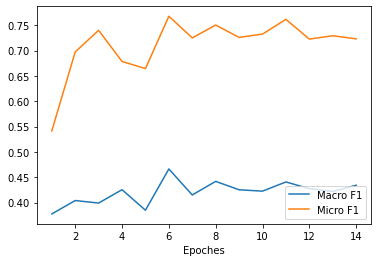

In [76]:
plt.plot(epoches,macro,label='Macro F1')
plt.plot(epoches,micro,label='Micro F1')
plt.xlabel('Epoches')
plt.legend(loc="lower right")
plt.show()

In [40]:
print("Evulation on COVID-19 Country Image Dataset with Oversampling\nUsing BERT-pair and NLI_M Auxiliary Sentence:\n")
target= '.\\data\\covid\\bert-pair\\test_NLI_M.csv'
predict = '.\\results\\covid\\NLI_M_Sampled_SameLargeEpoch\\test_ep_10.txt'
d=dict(zip([i for i in range(4)],['unrelated', 'negative', 'neutral', 'positive']))
evulate(target,predict)

Evulation on COVID-19 Country Image Dataset with Oversampling
Using BERT-pair and NLI_M Auxiliary Sentence:

Aspect:Politics   Accuracy:71.429%(190/266)  Macro F1:0.388    Micro F1:0.714
Aspect:Economy    Accuracy:97.368%(259/266)  Macro F1:0.246    Micro F1:0.973
Aspect:Foreign    Accuracy:76.692%(204/266)  Macro F1:0.274    Micro F1:0.766
Aspect:Culture    Accuracy:99.624%(265/266)  Macro F1:0.499    Micro F1:0.996
Aspect:Situation  Accuracy:68.421%(182/266)  Macro F1:0.461    Micro F1:0.684
Aspect:Measures   Accuracy:54.511%(145/266)  Macro F1:0.306    Micro F1:0.545
Aspect:Racism     Accuracy:72.18%(192/266)  Macro F1:0.265    Micro F1:0.721
Aspect:Overall    Accuracy:45.865%(122/266)  Macro F1:0.282    Micro F1:0.458

Overal: Accuracy: 0.732   Macro F1: 0.42249213850111256    Micro F1: 0.7326127819548873


In [32]:
target= '.\\data\\covid\\bert-pair\\test_NLI_M.csv'
predict = '.\\results\\covid\\NLI_M_Sampled_Samesize\\test_ep_2.txt'
df_y = pd.read_csv(target,sep='\t',header=None)
df_pred = pd.read_csv(predict,sep=' ',header=None)
df_pred[0] = df_pred[0].apply(lambda x: d[x])
df_pred['aspect']=df_y[2]

In [33]:
df_pred

,0,1,2,3,4,aspect
0,negative,0.339994,0.633156,0.026731,0.000119,politics
1,unrelated,0.824347,0.112055,0.063437,0.000160,economy
2,unrelated,0.640332,0.306598,0.052758,0.000311,foreign
3,unrelated,0.799055,0.178038,0.022870,0.000037,culture
4,unrelated,0.595481,0.336465,0.067968,0.000086,situation
...,...,...,...,...,...,...
2123,unrelated,0.937245,0.039954,0.022769,0.000032,culture
2124,neutral,0.231238,0.161286,0.607125,0.000351,situation
2125,unrelated,0.560235,0.062763,0.375591,0.001411,measures
2126,unrelated,0.597013,0.377209,0.025708,0.000069,racism


In [34]:
df_y[0]=df_pred[0]
dy_y

NameError: name 'dy_y' is not defined

In [ ]:
dy_y[dy_y[1]=='positive']